In [38]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

In [46]:
result = pd.read_csv(r"data copy.csv", index_col=0)



In [40]:
# result.drop("salePrice", 1, inplace=True)
# result.drop("normalPrice", 1, inplace=True)
# result.to_csv(r"data copy.csv", index=True)

In [78]:
result


,savings,metacriticScore,steamRatingPercent,releaseDate,lastChange,dealRating
4,90.045023,68,77,1610582400,1635343461,9.6
5,90.865144,88,84,1454630400,1635423966,9.6
6,85.042521,91,92,1382400000,1635448689,9.6
7,85.034014,91,88,1468281600,1635450951,9.6
8,90.015003,88,84,1454630400,1635448217,9.5
...,...,...,...,...,...,...
40527,0.000000,52,35,1400112000,1629389113,0.0
40528,0.000000,52,35,1400112000,1548864012,0.0
40529,0.000000,52,35,1400112000,1628607952,0.0
40530,0.000000,52,35,1400112000,1604761413,0.0


In [42]:
# indexes = list()
# for index, row in result.iterrows():
#     if (row["isOnSale"] == 0):
#         indexes.append(index)
# print(len(indexes))
# result.drop(indexes, axis=0, inplace=True)
# result.drop("Unnamed: 0", 1, inplace=True)
# result.to_csv(r"data copy.csv", index=True)

Text(0, 0.5, 'Saving')

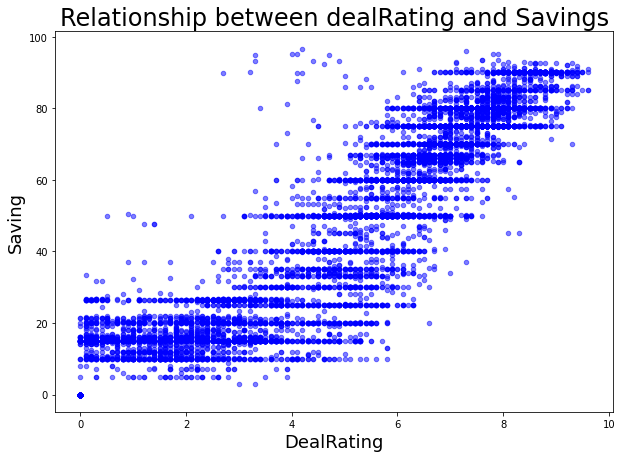

In [79]:
import matplotlib.pyplot as plt

ax1= result.plot(kind='scatter', x='dealRating',y='savings', color='blue',alpha=0.5, figsize=(10,7))


plt.title('Relationship between dealRating and Savings', size=24)
plt.xlabel('DealRating', size=18)
plt.ylabel('Saving', size=18)

In [61]:
# 

X = result.drop('dealRating', axis = 1)   # X  For Train
y = result['dealRating']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.20,random_state=0)

In [80]:
# normalização
from sklearn.preprocessing import normalize
y_train
# x_normalized = normalize(X)
# print(x_normalized)

30421    0.0
27470    0.0
30088    0.0
388      8.5
39989    0.0
        ... 
33944    0.0
3369     6.9
26486    0.0
28421    0.0
2765     7.2
Name: dealRating, Length: 12562, dtype: float64

In [64]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train) #training the algorithm

print('Intercept:',model.intercept_)

# For retrieving the slope:
print('Slope:',model.coef_)

Intercept: -6.447922093790366
Slope: [9.34569752e-02 2.13430500e-02 3.90082572e-04 7.02737320e-10
 2.62303411e-09]


In [65]:
y_pred = model.predict(X_test)
X_test.head()

,savings,metacriticScore,steamRatingPercent,releaseDate,lastChange
6040,49.979992,86,96,1590019200,1635174681
4366,75.075075,64,53,1049673600,1634939987
8147,40.020010,80,97,1568851200,1635402102
3454,60.040027,78,93,1590624000,1635549877
5837,50.029429,47,56,1616630400,1635147984


In [76]:
# plt.plot(X_test, model.predict(X_test), color='red',linewidth=3)
df_pred = pd.DataFrame({'Index': y_test.index, 'Actual': y_test.ravel(), 'Predicted': y_pred.ravel()})
df_pred

,Index,Actual,Predicted
0,6040,5.8,5.502492
1,4366,6.4,6.981145
2,8147,5.0,4.429715
3,3454,6.9,6.272167
4,5837,5.9,4.677760
...,...,...,...
3136,23397,1.4,1.497990
3137,3500,6.9,6.964304
3138,17338,2.9,1.726273
3139,18313,2.7,1.797856


In [77]:
print(model.score(X_test,y_test))


0.9386837010090255
